In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('datos_limpios.csv') 

In [3]:
X = data.drop(['Salary'], axis=1)
Y = data['Salary']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

Busqueda del mejor hiperparametro

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': range(10, 25)}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

c:\Users\xavie\miniconda3\envs\datasc\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 18}
Mejor puntuación de validación cruzada:
0.676567104083164


In [5]:
best_clf = grid_search.best_estimator_
best_clf


DecisionTreeClassifier(criterion='entropy', max_depth=18, random_state=42)

In [6]:
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

Entrenamiento y resultado del dataset

In [9]:
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print('El coeficiente de determinacion en train es:',accuracy_score(Y_train,y_train_pred))
print('El coeficiente de determinacion en test es:', accuracy_score(Y_test,y_test_pred))

El coeficiente de determinacion en train es: 0.7738349722103463
El coeficiente de determinacion en test es: 0.674975074775673


Arbol de decision

[Text(0.40153614662676823, 0.9736842105263158, 'x[2] <= 5.5\nentropy = 6.157\nsamples = 4678\nvalue = [1, 1, 1, 1, 88, 23, 2, 41, 11, 24, 6, 89, 11\n4, 4, 81, 4, 2, 51, 2, 1, 8, 12, 141, 2, 2\n14, 3, 1, 2, 2, 2, 179, 2, 2, 20, 6, 164, 5\n1, 1, 1, 1, 2, 119, 4, 1, 1, 1, 143, 3, 3, 6\n1, 6, 1, 3, 2, 1, 90, 2, 1, 1, 1, 1, 6, 3\n2, 1, 1, 139, 2, 1, 1, 3, 1, 75, 1, 1, 1, 3\n1, 2, 1, 1, 122, 1, 1, 1, 1, 3, 2, 1, 13, 2\n2, 97, 2, 3, 2, 7, 2, 133, 1, 2, 3, 6, 2, 3\n3, 1, 1, 3, 2, 5, 3, 2, 2, 56, 2, 1, 2, 2\n1, 1, 1, 1, 1, 2, 134, 4, 1, 1, 4, 2, 1, 3\n2, 66, 2, 6, 1, 1, 10, 2, 1, 1, 2, 204, 2, 1\n1, 2, 1, 6, 3, 1, 1, 1, 2, 1, 34, 1, 2, 1\n2, 1, 2, 2, 2, 1, 154, 1, 1, 1, 6, 1, 1, 3\n1, 1, 1, 2, 1, 49, 3, 3, 3, 1, 1, 2, 1, 1\n1, 3, 1, 2, 2, 1, 1, 1, 189, 3, 1, 1, 1, 1\n1, 1, 39, 2, 5, 4, 1, 2, 3, 1, 2, 2, 1, 115\n1, 2, 3, 1, 1, 1, 1, 3, 1, 4, 1, 3, 1, 1\n1, 1, 1, 1, 43, 4, 1, 2, 6, 1, 184, 2, 1, 1\n5, 1, 3, 1, 2, 2, 2, 11, 2, 2, 2, 1, 2, 3\n1, 3, 4, 2, 1, 1, 1, 150, 1, 1, 1, 2, 2, 1\n1, 2, 1, 3, 

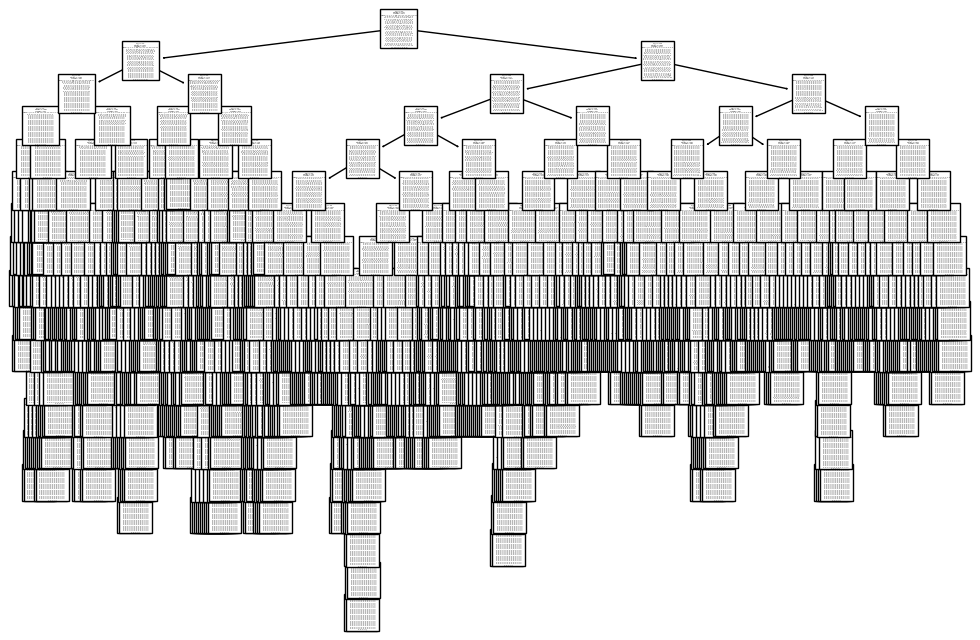

In [8]:
plt.figure(figsize = (12,8))
from sklearn import tree

tree.plot_tree(best_clf.fit(X_train, Y_train))